In [1]:
%load_ext autoreload
%autoreload 2

import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from xml.etree import cElementTree as ET
import re
import json
from collections import Counter
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [5]:
plt.rcParams.update({'font.size': 18})
bar_width = 0.8

In [6]:
'''each txt file is a review'''
example = '/home/dashi/lulu/corpus/aclImdb/sample/9_7.txt'
exampleDir = '/home/dashi/lulu/corpus/aclImdb/sample/'
directory = '/home/dashi/lulu/corpus/aclImdb/train/pos/'
output = '/home/dashi/lulu/corpus/aclImdb/aclImdb-articles.txt'


In [7]:
emos = loadEmotionWords('/home/dashi/lulu/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [9]:
'''example directory'''
read_files = glob.glob(exampleDir + '*.txt')

scores = []
for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        r = scoreArticle(f, emos)
        scores += r

In [10]:
scores

[0.0136986301369863, 0.0228310502283105, 0.02459016393442623]

In [11]:
'''corpus directory'''
read_files = glob.glob(directory + '*.txt')

scores = []
for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        r = scoreArticle(f, emos)
        scores += r

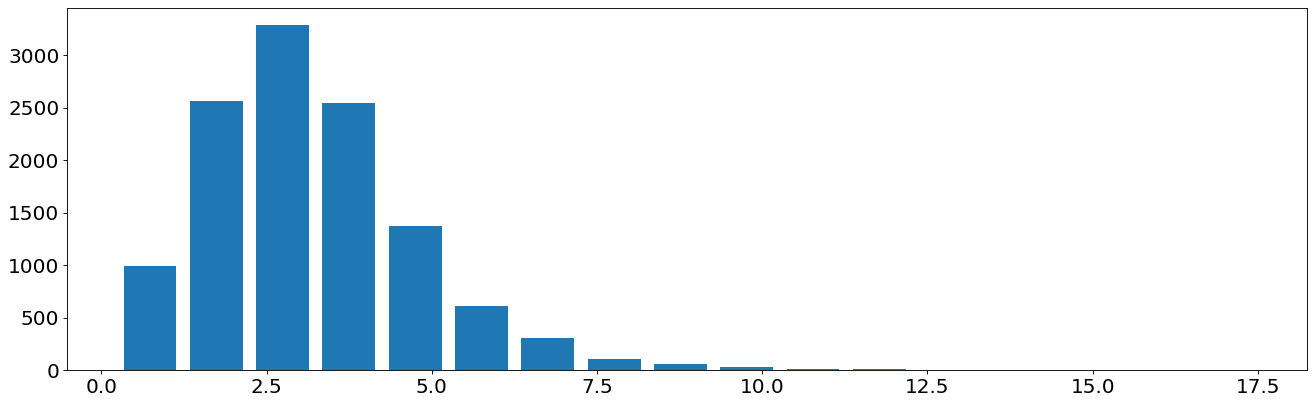

In [22]:
scoresPer = np.array(scores)*100
maxScore = int(max(scoresPer))
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
n_bins = maxScore
plt.hist(scoresPer,bins=n_bins,width = 0.8)
plt.show()

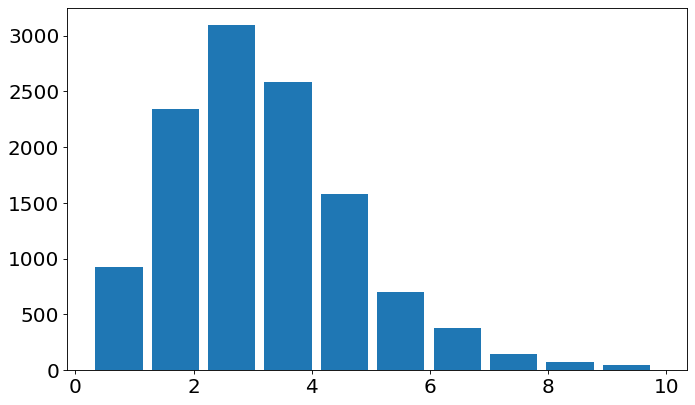

In [25]:
'''closely look at the bottom 10 percent'''
scoresLow = [s for s in scores if s < 0.1]
scoresPer = np.array(scoresLow)*100
maxScore = 10
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
n_bins = 10
plt.hist(scoresPer,bins=n_bins,width = 0.8)
plt.show()